# UCL AI Society Machine Learning Tutorials
### Session 02. Introduction to Machine Learning

## Contents
1. Train/test set split
2. Various Cross Validation teqniques
3. Regressions
4. Classifications
5. All in one challenge: Boston house

## Aim
At the end of this session, you will be able to:
- Understand how to prepare your dataset.
- Use the most popular library in Machine Learning
- Implement simple regression and classification models.
- Practice a whole machine learning project individually

## 0. Introduction to Classification
From the last section, you've learned what Regression is. Classification is another important branch in Machine Learning.  
So what is classification?  
It is an area of supervised learning that tries to predict which class or category some entity belongs to, based on its features.  

Classification can have four types of result:
1. True Negative
2. Treu Positive
3. False Negative
4. False Positive
We will dive more into this, later in this tutorial series.


In this notebook we will discover when we should use classification rather than regression, and types of classification algorithms.

Type of Classifiers:
- Logistic Regression (Its name is regression, but it's much more close to classification than regression)
- Softmax
- Naive Bayes
- SVM
- KNN
- Decision Tree

This notebook will cover logistic regression and Decision tree. Others can possibly dealt in the next session.

# 1. Logistic Regression

Useful videos:
1. [Andrew Ng's explanation 1](https://www.youtube.com/watch?v=-la3q9d7AKQ)
2. [Andrew Ng's explanation 2](https://www.youtube.com/watch?v=t1IT5hZfS48)
3. [Andrew Ng's explanation 3](https://www.youtube.com/watch?v=F_VG4LNjZZw)
4. [Andrew Ng's explanation 4](https://www.youtube.com/watch?v=HIQlmHxI6-0)

Logistic regression is a well-motivated approach to discriminative classification which leads to a smooth, convex, optimisation problem.  

Logistic regression is also a basis of Neural Network. Logistic Regression is sometimes called, a single node of Artificial Neuron. We will get back to what this means afterwards when we are doing Deep Learning.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from scipy.special import expit

## 1-1. In which case do we use classification?

**Let's generate a toy dataset that is suitable for classification**

In [7]:
np.random.seed(0)
n_samples= 100

X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)

X[X > 0] *= 5
X += .7 * np.random.normal(size=n_samples)
X = X[:, np.newaxis]

In [8]:
X.shape, y.shape

((100, 1), (100,))

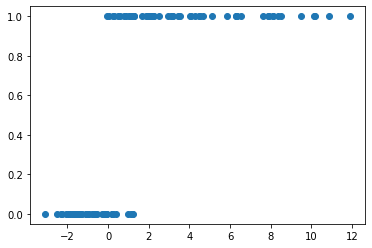

In [18]:
plt.scatter(X, y)

What if our data looks like the above? Would you still use your linear regression model?  
Probably not. When your data has classes and your task is to classify the data, you normally use classification method, and Logistic Regression is a good start in learning classification.  
Please do watch the Andrew Ng's video on Logistic Regression to fully understand mathematically.  

I've written a function called `compare_logistic_linear`, which fits the data into the logistic regression model and a simple ordinary least squared linear regression model. Then, it plots the two in one plot for better visual representation on why you should consider using classification rather than regression.  

Plus, note the the term 'logistic regression' has a word 'regression' inside.  
It is because the logistic regression is a generalised linear model using the same basic formula of linear regression but it is regressing for the probability of a categorical outcome by using `sigmoid` function.

In [19]:
def compare_logistic_linear(model, X_data, y_data):
    """
    This function plots the given data - X_data and y_data
    then fit the data both into given `model` and LinearRegression model.
    Then shows the difference by plotting both of them.
    """
    plt.clf()
    plt.scatter(X_data.ravel(), y_data, color='black', zorder=20)
    X_test = np.linspace(-5, 10, 300)

    loss = expit(X_test * model.coef_ + model.intercept_).ravel()
    plt.plot(X_test, loss, color='red', linewidth=3)
    
    # Ordinary Least Squared Linear Regression
    ols = linear_model.LinearRegression()
    ols.fit(X_data, y_data)
    plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
    plt.axhline(.5, color='.5')

    plt.ylabel('y')
    plt.xlabel('X')
    plt.xticks(range(-5, 10))
    plt.yticks([0, 0.5, 1])
    plt.ylim(-.25, 1.25)
    plt.xlim(-4, 10)
    plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
               loc="lower right", fontsize='small')
    plt.tight_layout()
    plt.show()

In [20]:
logistic_clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
logistic_clf.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

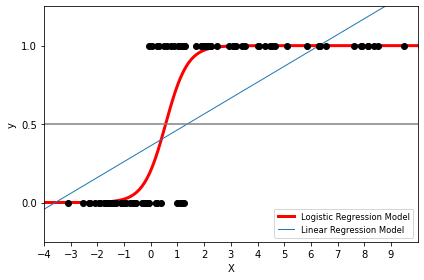

In [21]:
compare_logistic_linear(logistic_clf, X, y)

## 1-2. Implementing a logistic classifier from scratch

In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import classification_report,accuracy_score

"""
If you are not familiar with this iris dataset, feel free to explore this dataset by EDA. 
However, for now, I recommend you to just assume that you are given this data.
We will explore this dataset in the later section of this notebook (2-3. Decision Tree)
"""
iris = load_iris()
X = iris.data[:, :2]  # We will only use two features. Do not change X.
y = (iris.target != 0) * 1

In [48]:
X[:3], y[:3]

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2]]), array([0, 0, 0]))

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [50]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

If you have watched Andrew Ng's lecture video, you will know that the cost function for logistic regression is below:  
\begin{align}
J\left(\theta \right) & =  -{\frac{1}{n}}[\sum_{i=1}^n \left(y_i \log_2(P_r(\hat{y}=1|x_i;\theta))+(1-y_i)\log_2(1-P_r(\hat{y}=1|x_i;\theta)) \right)]\\
\end{align}

You are asked to complete the LogisticRegression Class below.   
y_hat should be:  
\begin{align}
\hat{y} & = \frac{1}{1+e^{-\theta^{*t}x}}
\end{align}

Since you are already familiar with the Iris dataset which is an in-built dataset provided by scikit learn, we will use that one.

In [55]:
def sigmoid(z):
    # TODO
    # return y_hat. Look at the cell above. e to the -theta time x is just a z, our input of this function.
    return 1. / (1. + np.exp(-z))

def loss(h, y):
    # TODO:
    # return the loss function J
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
 
def logRegParamEstimates(x_train, y_train):
    ## TODO: Fill in the 'None's  ##
    
    intercept = np.ones((x_train.shape[0], 1))
    x_train = np.concatenate((intercept, x_train), axis=1)
    y_train[y_train > 1] = 0
    #  Initialisation of theta.
    theta = np.zeros(x_train.shape[1])
    lr = 0.01
    for i in range(100):
        #gradient = ...
        z = np.dot(x_train, theta)
        h = sigmoid(z)
        # gradient part below was going to be TODO'ed, but since it can be hard to some of you guys, I'll just leave it.
        # But don't overlook this gradient part.
        gradient=(1/(math.log(2)*x_train.shape[0]))*np.dot((h-y_train),x_train)
        # TODO: update theta
        # you reassign theta as theta minus gradient*learning_rate
        # Imagine you are walking down the gradient convex with a step size of `learning rate`*gradient.
        # Think why you should subtract the `gradient*learning_rate' rather than adding it to the theta.
        theta = theta-lr*gradient
    return theta

def logistic_regression_predict(x_train, y_train, x_test):
    ## TODO: Fill in the 'None's  ##
    
    theta = logRegParamEstimates(x_train, y_train)
    intercept = np.ones((x_test.shape[0], 1))
    x_test = np.concatenate((intercept, x_test), axis=1)
    sig = sigmoid(np.dot(x_test, theta))
    y_pred1=[]
    for i in range(len(sig)):
        if sig[i]>=0.5:
            y_pred1.append(1)
        else:
            y_pred1.append(3)
    return y_pred1


In [56]:
y_pred1 = logistic_regression_predict(x_train, y_train,x_test)
print('Accuracy on test set: '+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test,y_pred1))#text report showing the main classification metrics

Accuracy on test set: 0.6578947368421053
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.66      1.00      0.79        25

    accuracy                           0.66        38
   macro avg       0.33      0.50      0.40        38
weighted avg       0.43      0.66      0.52        38



# 2. Decision Tree
We will now look into different classification algorithm, which is called a Decision Tree Classifer.  
Before we dive into it, let's first get to know what tree is in computer science.


## 2-1. Getting used to Tree Structure (optional)
The most basic tree is a Binary Tree, and it is crucial to know what Binary Tree is to undertand the Decision Tree Classifiers.  
There are two search algorithms in tree structure. One is **Breadth First Search (BFS)** and the other is **Depth First Search (DFS)**. BFS and DFS are not only used in tree but also used in general graph structure. However, in this notebook we will only look into the cases in trees.

Note:  
Don't worry if you are not familiar with recursion and data structure. This section is just to show you what Tree is. Just get the gist of the way it works.

1. **Binary Tree Breath First Search (BFS)**

In [35]:
# BFS uses Queue as its Data Structure
import queue

In [36]:
class Node():
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

In [37]:
def completeBinaryTree(lst):
    def helper(index):
        if index >= len(lst):
            return None
        node = Node(lst[index])
        node.left = helper(index * 2 + 1)     # Think why the index should be 2n+1
        node.right = helper(index * 2 + 2)    # Think why the index should be 2n+2
        return node

    return helper(0)

In [38]:
# This function is implemented as BFS algorithm.
def printTree(node):
    all_lines = []
    line = []

    q = queue.Queue()
    q.put(node)
    q.put(Node(-1))

    while q.qsize() > 0:
        node = q.get()

        if not node:
            continue
        else:
            if node.val == -1:
                if q.qsize() > 0:
                    all_lines.append(line)
                    line = []
                    q.put(Node(-1))
            else:
                line.append(node.val)
                q.put(node.left)
                q.put(node.right)

    return all_lines

In [39]:
# Try different lists and visualise how the tree looks like
node_bfs = completeBinaryTree([1, 2, 3, 4, 5, 6, 7])
printTree(node_bfs)

[[1], [2, 3], [4, 5, 6, 7]]

2. **Binary Tree Depth First Search (DFS)** 

Here, we will reuse `Node` data structure, `completeBinaryTree` and `printTree` functions.  
This time, to learn what DFS is, let me show you a simple DFS example.  

Consider every route/path from the root (top Node of the tree) to the leaf (bottom Node of the tree). 
Every step, you should swim down the tree and sum the value of each node.
Among the paths, if at least one sum of the path is equal to the number that you were given, you return True and False otherwise.  

For example, say you were given a number 10,  
and your tree looks like:  
```
         1
     2       3
   4   5   6   7
```
By DFS, you should search every possible route:  
1-2-4, 1-2-5, 1-3-6, 1-3-7.  Among these, sum of 1-3-6 make 10, so you return True.   
If the given number was 18, you return False, because no single route can make 18.

In [40]:
# Depth First Search in Binary Tree
def path_sum(node, targetSum):
    def dfsHelper(node, curSum):

        if node is None:
            if curSum == targetSum:
                return True
            else:
                return False
        else:
            curSum += node.val
            is_left = dfsHelper(node.left, curSum)
            is_right = dfsHelper(node.right, curSum)

        return is_left or is_right

    dfsHelper(node, 0)

    return dfsHelper(node, 0)

In [41]:
node_dfs = completeBinaryTree([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
print(printTree(node_dfs))

print(path_sum(node_dfs, 16))
print(path_sum(node_dfs, 22))
print(path_sum(node_dfs, 35))

[[1], [2, 3], [4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14, 15], [16]]
True
True
False


## 2-2. Manually emulating a simple Binary Tree Classifier (optional)
Try chaining configurations and code to see what's exactly happpening in this section

In [1]:
import pandas as pd

In [72]:
# We'll make a Classifier that classifies names based on major, height and gender
name = ['Nick', 'Danny', 'Claire', 'Rachel', 'Kamen', 'Bianca', 'Alice']
major = ['CS', 'CS', 'Neuroscience', 'Neuroscience', 'CS', 'Neuroscience', 'History']
height = [180, 177, 163, 168, 182, 170, 165]
gender = ['M', 'M', 'F', 'F', 'M', 'F', 'F']

In [73]:
# Node number --> should be a global var
num = 0

# print as a Dataframe
data = pd.DataFrame({'Name': name, 'Major': major, 'Height': height, 'Gender': gender})
data

,Name,Major,Height,Gender
0,Nick,CS,180,M
1,Danny,CS,177,M
2,Claire,Neuroscience,163,F
3,Rachel,Neuroscience,168,F
4,Kamen,CS,182,M
5,Bianca,Neuroscience,170,F
6,Alice,History,165,F


In [74]:
# Height classifier Node
def Height_Node(df, idx, depth):
    global num
    num += 1
    print('Node_num : {} | Node Depth : {} | Height_Node'.format(num, depth))

    for i in idx:
        num += 1
        # Gender probably can have a strong correlation with heights
        if df['Gender'][i] == 'M':
            # 180 is classifying standard for men
            if df['Height'][i] < 180:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth, df['Name'][i]))
            else:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth, df['Name'][i]))
        
        else:
            # 165 is classifying standard for women
            if df['Height'][i] < 165:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth, df['Name'][i]))
            else:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth, df['Name'][i]))

In [75]:
# Major classifier Node
def Major_Node(df, idx, depth):
    global num
    num += 1
    print('Node_num : {} | Node Depth : {} | Gender_Node'.format(num, depth))

    # List for storing index of CS guys
    CS = []

    for i in idx:
        # Store index if one's major is CS
        if df['Major'][i] == 'CS':
            CS.append(i)

        # print Node number, depth and name if Neuroscience
        else:
            num += 1
            print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth, df['Name'][i]))

    print('CS Index : ', CS)

    # Classify CS guys by height, and depth should be increased by 1
    Height_Node(df, CS, depth + 1)

In [76]:
# Gender classifier Node
def Gender_Node(df, depth):
    global num
    num += 1
    print('Node_num : {} | Node Depth : {} | Gender_Node'.format(num, depth))

    male = []
    female = []
    
    # classify by gender
    for idx, gen in enumerate(df['Gender']):
        if gen == 'M':
            male.append(idx)
        elif gen == 'F':
            female.append(idx)

    print('Male Index : ', male)
    print('Female Index : ', female)

    # Call Major classifier after classifying peeps by gender
    # Always increase depth by 1 when calling next node.
    # Major Node will then call Height Node
    Major_Node(df, male, depth + 1)
    Major_Node(df, female, depth + 1)

In [82]:
Gender_Node(data, 1); num=0  # num=0 is just to reinitialise `num` if you run this cell again

Node_num : 1 | Node Depth : 1 | Gender_Node
Male Index :  [0, 1, 4]
Female Index :  [2, 3, 5, 6]
Node_num : 2 | Node Depth : 2 | Gender_Node
CS Index :  [0, 1, 4]
Node_num : 3 | Node Depth : 3 | Height_Node
Node_num : 4 | Node Depth : 3 | Name : Nick
Node_num : 5 | Node Depth : 3 | Name : Danny
Node_num : 6 | Node Depth : 3 | Name : Kamen
Node_num : 7 | Node Depth : 2 | Gender_Node
Node_num : 8 | Node Depth : 2 | Name : Claire
Node_num : 9 | Node Depth : 2 | Name : Rachel
Node_num : 10 | Node Depth : 2 | Name : Bianca
Node_num : 11 | Node Depth : 2 | Name : Alice
CS Index :  []
Node_num : 12 | Node Depth : 3 | Height_Node


## 2-3. Decision Tree
Now you're ready to dive into the real Decision Tree Classifier!  
Please do take time to watch videos below. They are worth watching. 

### Must watch: Good video about Decision tree
1. Decision Tree Basics: https://www.youtube.com/watch?v=7VeUPuFGJHk&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=38
2. Decision Tree Advanced: https://www.youtube.com/watch?v=wpNl-JwwplA&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=39

In [172]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Always check documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [173]:
# Load iris data set
iris = load_iris()

In [174]:
# iris is a dictionary that contains data, target data, and other information
# so you can access values by specifying key name
# for more detailed info, 
# visit: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [175]:
# X data has its shape of 150x4
# y data has its shape of (150,)  --> which means that it is just an array of numbers --> can be reshaped to (150, 1)
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [176]:
# each row has 4 training features, which are ouputted below
iris.data[0], iris.feature_names

(array([5.1, 3.5, 1.4, 0.2]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [177]:
# each row the answer is one of three flowers- setosa, versicolor, or virginica
iris.target, iris.target_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [178]:
# Split the iris dataset. tes
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [179]:
# get decision tree classifier from scikit learn
dtree = DecisionTreeClassifier()

Introducing `GridSearchCV`

In [180]:
# Hyperparameters candidates
# max_depth: The maximum depth of the tree. 
#            If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

# min_samples_split: The minimum number of samples required to split an internal node:
#                    If int, then consider min_samples_split as the minimum number.
#                    If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
param_grid = {'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]}

### Grid Search Cross Validation ###
# Since i've set 3 params for max_depth and 2 for min_samples_split, 
# they will try out 6 combinations of those and pick one combination that let our model perform the best
## Question: what does cv parameter do, and why did I set cv=3 ?  ##
grid_dtree = GridSearchCV(dtree, param_grid=param_grid, cv=3, refit=True, iid=True)
# iid is set to True to avoid DeprecationWarning. You don't need to consider what iid is.

In [181]:
# Train
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid=True, n_jobs=None,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [182]:
# cv_results_ is an attribute of GridSearchCV 
# and it is a dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.
scores_df = pd.DataFrame(grid_dtree.cv_results_)
print(scores_df)
scores_df[
    ['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.000531      0.000135         0.000310    6.125280e-05   
1       0.000311      0.000008         0.000247    4.293006e-06   
2       0.000328      0.000008         0.000246    4.495664e-07   
3       0.000346      0.000034         0.000252    6.035753e-06   
4       0.000333      0.000003         0.000249    8.778064e-07   
5       0.000329      0.000004         0.000251    4.577802e-06   

  param_max_depth param_min_samples_split  \
0               1                       2   
1               1                       3   
2               2                       2   
3               2                       3   
4               3                       2   
5               3                       3   

                                     params  split0_test_score  \
0  {'max_depth': 1, 'min_samples_split': 2}           0.658537   
1  {'max_depth': 1, 'min_samples_split': 3}           0.658537   
2  {'max_depth':

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.666667,5,0.658537,0.675,0.666667
1,"{'max_depth': 1, 'min_samples_split': 3}",0.666667,5,0.658537,0.675,0.666667
2,"{'max_depth': 2, 'min_samples_split': 2}",0.941667,1,0.926829,0.950,0.948718
3,"{'max_depth': 2, 'min_samples_split': 3}",0.941667,1,0.926829,0.950,0.948718
4,"{'max_depth': 3, 'min_samples_split': 2}",0.933333,3,0.951220,0.950,0.897436
5,"{'max_depth': 3, 'min_samples_split': 3}",0.933333,3,0.951220,0.950,0.897436


In [183]:
# Try printing out different attributes that GridSearchCV have
print('GridSearchCV-> best parameter combination : ', grid_dtree.best_params_)
print('GridSearchCV-> best score : {0:.4f}'.format(grid_dtree.best_score_))

# Get the best model/estimator
estimator = grid_dtree.best_estimator_
estimator

GridSearchCV-> best parameter combination :  {'max_depth': 2, 'min_samples_split': 2}
GridSearchCV-> best score : 0.9417


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [186]:
pred = estimator.predict(X_test)
print(f'Test Dataset accuracy : {accuracy_score(y_test, pred)}')

Test Dataset accuracy : 0.9333333333333333


## Now it's time to exercise by yourself

In [227]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Below are new imports
from sklearn.model_selection import KFold, train_test_split
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [191]:
digits = load_digits()

In [193]:
# TODO: Explore digits Dataset by yourself. 
# TODO: Try visualising each digit, by using matplotlib or any visualisation tool you may prefer

In [194]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [242]:
def visualise_digit(index):
    digit = digits.data[index]
    answer = digits.target[index]
    print(answer); del answer
    
    rows = []
    for i in range(8):
        row = digit[8*i:8*i + 8]
        rows.append(row)
    rows = np.array(rows)
    
    plt.matshow(rows)

0
2
7


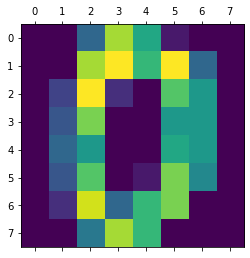

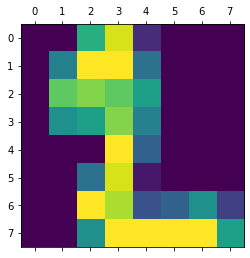

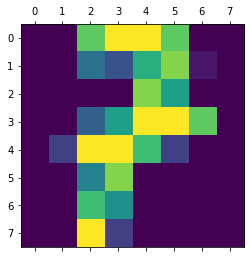

In [249]:
for i in range(digits.target.shape[0]):
    if i % 600 == 0:
        visualise_digit(i)

In [250]:
feature = digits.data
label = digits.target

dt_clf = DecisionTreeClassifier()

param_grid = {'max_depth': np.arange(1, 30), 'min_samples_split': np.arange(2, 7)}

In [252]:
# We will going to use KFold CV, just to revise
n_splits = 5    # This is 5 for reason, but feel free to try out different numbers
kfold = KFold(n_splits=n_splits)
n_iter = 0
cv_accuracy = []

# TODO: Split with ratio 7:3
X_train, X_test, y_train, y_test = train_test_split(feature, label, train_size=0.7)

# TODO: Do `n_splits` KFold cross validation
for train_idx, vali_idx in kfold.split(X_train):
    X_fold_train, X_fold_vali = X_train[train_idx], X_train[vali_idx]
    y_fold_train, y_fold_vali = y_train[train_idx], y_train[vali_idx]

    # TODO: Train your model with GridSearchCV
    grid_dtree = GridSearchCV(dt_clf, param_grid=param_grid, cv=5, refit=True, iid=True)
    grid_dtree.fit(X_fold_train, y_fold_train)

    # TODO: predict the output for each fold with validation set
    fold_pred = grid_dtree.predict(X_fold_vali)

    n_iter += 1
    acc_score = accuracy_score(y_fold_vali, fold_pred)
    print('Iter : {0}, CV accuary : {1:.4f}'.format(n_iter, acc_score))

    cv_accuracy.append(acc_score)

Iter : 1, CV accuary : 0.8532
Iter : 2, CV accuary : 0.8333
Iter : 3, CV accuary : 0.8167
Iter : 4, CV accuary : 0.8207
Iter : 5, CV accuary : 0.7928


In [255]:
# TODO: calculate the mean of cv accuracy
cv_accuracy_mean = np.mean(cv_accuracy)
print("Mean acc : {0:.4f}".format(cv_accuracy_mean))

# TODO: What's the best param combi and best score?
print('GridSearchCV -> best param : ', grid_dtree.best_params_)
print('GridSearchCV -> best accuracy : {0:.4f}'.format(grid_dtree.best_score_))

# TODO: get the best performing model
estimator = grid_dtree.best_estimator_

# TODO: predict with test data
pred = estimator.predict(X_test)

# How's the accuarcy of unseen data?
test_accuracy = accuracy_score(pred, y_test)
print("test accuarcy : {0:.4f}".format(test_accuracy))

Mean acc : 0.8234
GridSearchCV -> best param :  {'max_depth': 9, 'min_samples_split': 3}
GridSearchCV -> best accuracy : 0.8419
test accuarcy : 0.8463


For those who want to learn further, learn:
- KNeighbors Classifier
- Ensemble
- Voting Classifier
- Gradient Boosting
- Random Forest

Some of those above can be dealt in the next session :) so stay tuned!